# Esophageal Cancer

To solve the question: "What's the relationship between the TP53 gene and Esophageal Cancer when considering the influence of age?"

In [30]:
import pandas as pd
import numpy as np
clinical_data = pd.read_csv(r'C:\Users\张宇强\Desktop\TCGA.PRAD.sampleMap_PRAD_clinicalMatrix', sep='\t', index_col=0)
gene_data = pd.read_csv(r'C:\Users\张宇强\Desktop\HiSeqV2_PANCAN', sep='\t', index_col=0)

In [2]:
clinical_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,albumin_result_specified_value,...,_GENOMIC_ID_TCGA_CHOL_miRNA_HiSeq,_GENOMIC_ID_TCGA_CHOL_gistic2thd,_GENOMIC_ID_TCGA_CHOL_gistic2,_GENOMIC_ID_TCGA_CHOL_PDMRNAseqCNV,_GENOMIC_ID_TCGA_CHOL_exp_HiSeqV2_exon,_GENOMIC_ID_data/public/TCGA/CHOL/miRNA_HiSeq_gene,_GENOMIC_ID_TCGA_CHOL_mutation_ucsc_maf_gene,_GENOMIC_ID_TCGA_CHOL_PDMRNAseq,_GENOMIC_ID_TCGA_CHOL_exp_HiSeqV2_percentile,_GENOMIC_ID_TCGA_CHOL_RPPA
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,TCGA-3X-AAV9-01,TCGA-3X-AAV9,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.7,...,TCGA-3X-AAV9-01,TCGA-3X-AAV9-01A-72D-A416-01,TCGA-3X-AAV9-01A-72D-A416-01,TCGA-3X-AAV9-01,59012a78-0e8f-4b99-af97-0dbb1d3d0513,TCGA-3X-AAV9-01,TCGA-3X-AAV9-01A-72D-A417-09,TCGA-3X-AAV9-01,59012a78-0e8f-4b99-af97-0dbb1d3d0513,AEB48F2C-59ED-45B1-BC10-1875590E7C47
TCGA-3X-AAVA-01,TCGA-3X-AAVA-01,TCGA-3X-AAVA,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,50,NaN,NaN,...,TCGA-3X-AAVA-01,TCGA-3X-AAVA-01A-11D-A416-01,TCGA-3X-AAVA-01A-11D-A416-01,TCGA-3X-AAVA-01,6a8ffc5d-444e-4864-bafd-ddf1ef900ef0,TCGA-3X-AAVA-01,TCGA-3X-AAVA-01A-11D-A417-09,TCGA-3X-AAVA-01,6a8ffc5d-444e-4864-bafd-ddf1ef900ef0,51164357-1D61-4499-82ED-169A9DA8A4C0
TCGA-3X-AAVB-01,TCGA-3X-AAVB-01,TCGA-3X-AAVB,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,70,3.3,4.3,...,TCGA-3X-AAVB-01,TCGA-3X-AAVB-01A-31D-A416-01,TCGA-3X-AAVB-01A-31D-A416-01,TCGA-3X-AAVB-01,88336d42-a31c-448f-a077-2608786c80fe,TCGA-3X-AAVB-01,TCGA-3X-AAVB-01A-31D-A417-09,TCGA-3X-AAVB-01,88336d42-a31c-448f-a077-2608786c80fe,NaN
TCGA-3X-AAVC-01,TCGA-3X-AAVC-01,TCGA-3X-AAVC,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.4,...,TCGA-3X-AAVC-01,TCGA-3X-AAVC-01A-21D-A416-01,TCGA-3X-AAVC-01A-21D-A416-01,TCGA-3X-AAVC-01,8c8d5e98-023b-4496-a237-2632c609f627,TCGA-3X-AAVC-01,TCGA-3X-AAVC-01A-21D-A417-09,TCGA-3X-AAVC-01,8c8d5e98-023b-4496-a237-2632c609f627,D423C8E5-02C2-445A-BA13-C74C0012E2B4
TCGA-3X-AAVE-01,TCGA-3X-AAVE-01,TCGA-3X-AAVE,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,60,3.3,4.0,...,TCGA-3X-AAVE-01,TCGA-3X-AAVE-01A-11D-A416-01,TCGA-3X-AAVE-01A-11D-A416-01,TCGA-3X-AAVE-01,c49a7f2a-f7ef-419d-829a-0b3a9f915aad,TCGA-3X-AAVE-01,TCGA-3X-AAVE-01A-11D-A417-09,TCGA-3X-AAVE-01,c49a7f2a-f7ef-419d-829a-0b3a9f915aad,NaN


In [3]:
gene_data.head()

,TCGA-4G-AAZT-01,TCGA-W5-AA2R-11,TCGA-W5-AA36-01,TCGA-W5-AA2U-01,TCGA-ZU-A8S4-11,TCGA-W5-AA30-11,TCGA-W5-AA2T-01,TCGA-W5-AA2I-01,TCGA-W5-AA2H-01,TCGA-3X-AAVA-01,...,TCGA-ZH-A8Y2-01,TCGA-W5-AA33-01,TCGA-4G-AAZO-01,TCGA-3X-AAVE-01,TCGA-W5-AA2W-01,TCGA-W5-AA2Z-01,TCGA-ZD-A8I3-01,TCGA-3X-AAVC-01,TCGA-W5-AA31-01,TCGA-W5-AA39-01
sample,,,,,,,,,,,,,,,,,,,,,
ARHGEF10L,0.318608,1.392808,0.823908,0.631008,1.526508,2.113908,0.348508,0.091908,-1.671692,0.856308,...,0.518108,0.068608,0.168608,0.401008,1.511808,0.491008,0.500708,0.241908,0.466608,1.944908
HIF3A,0.005374,-0.873826,-4.106826,-1.027726,0.085474,0.475574,1.838174,0.228874,2.306874,-1.619826,...,0.712174,-1.233926,-2.577826,-1.262126,-3.907726,1.168774,1.910674,2.165274,3.640074,2.114574
RNF17,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,-0.531035,...,0.503465,-0.531035,-0.531035,-0.531035,0.515765,1.159265,-0.531035,-0.531035,-0.076535,-0.531035
RNF10,-0.091772,0.138528,0.405528,-0.939772,-0.211972,-0.166372,-0.211972,0.141628,0.118428,0.298528,...,-0.549572,-0.393072,0.315128,0.221328,-0.201172,0.294028,-0.256072,-0.142172,0.366928,0.483328
RNF11,-0.363778,0.150622,-1.582778,-0.331178,0.343522,-0.062778,-0.314878,-0.897878,-1.524178,-0.868478,...,0.364422,-0.412278,-0.054378,0.254422,-1.168478,0.172922,-0.920378,-0.408378,0.252222,-0.084278


In [4]:
# Set Basic info
gene_fullname = 'TP53 gene'
gene = 'tp53'
condition = 'age'
condition_col = 'days_to_birth'
trait = 'Esophageal Cancer'

# Get the feature dimension of clinical data, and the number of genes
col_offset = len(clinical_data.columns)
num_genes = len(gene_data)
print(f'The clinical dataset has {col_offset} features, and the gene dataset includes {num_genes} genes')

The clinical dataset has 110 features, and the gene dataset includes 20530 genes


In [6]:
merged_data = clinical_data.join(gene_data.T)
merged_data.head()

,_INTEGRATION,_PATIENT,_cohort,_primary_disease,_primary_site,additional_pharmaceutical_therapy,additional_radiation_therapy,age_at_initial_pathologic_diagnosis,albumin_result_lower_limit,albumin_result_specified_value,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,TCGA-3X-AAV9-01,TCGA-3X-AAV9,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.7,...,-0.748878,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988
TCGA-3X-AAVA-01,TCGA-3X-AAVA-01,TCGA-3X-AAVA,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,50,NaN,NaN,...,-0.096478,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788
TCGA-3X-AAVB-01,TCGA-3X-AAVB-01,TCGA-3X-AAVB,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,70,3.3,4.3,...,-0.748878,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388
TCGA-3X-AAVC-01,TCGA-3X-AAVC-01,TCGA-3X-AAVC,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,72,3.3,2.4,...,-0.748878,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888
TCGA-3X-AAVE-01,TCGA-3X-AAVE-01,TCGA-3X-AAVE,TCGA Bile Duct Cancer (CHOL),cholangiocarcinoma,Bile duct,NaN,NaN,60,3.3,4.0,...,-0.748878,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188


In [7]:
input_cols = [condition_col] + merged_data.columns[col_offset: col_offset + num_genes].tolist()
merged_data = merged_data[input_cols]

# Remove sample rows with missing columns.
threshold_rows = 0.8 * len(merged_data)
rows_after_any = len(merged_data.dropna(how='any'))

# Prefer "how='any'", if it does not discard too much data.
if rows_after_any >= threshold_rows:
    merged_data = merged_data.dropna(how='any')
else:
    merged_data = merged_data.dropna(how='all')
    merged_data = merged_data.fillna(0)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,TULP2,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,-26349,-0.034092,3.596974,-0.531035,0.266528,-0.005678,-0.01181,-0.280994,1.530154,-0.423399,...,-0.748878,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988
TCGA-3X-AAVA-01,-18303,0.856308,-1.619826,-0.531035,0.298528,-0.868478,0.11769,1.499206,0.130454,-0.423399,...,-0.096478,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788
TCGA-3X-AAVB-01,-25819,0.226908,-0.639626,0.448965,-0.344772,-0.242478,-0.16491,-0.092294,0.190654,-0.423399,...,-0.748878,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388
TCGA-3X-AAVC-01,-26493,0.241908,2.165274,-0.531035,-0.142172,-0.408378,0.48889,-0.531094,0.213454,0.204201,...,-0.748878,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888
TCGA-3X-AAVE-01,-21943,0.401008,-1.262126,-0.531035,0.221328,0.254422,0.22079,0.694406,-0.827646,0.177401,...,-0.748878,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188


In [8]:
def mark_tumor(row_index):
    last_two_digits = int(row_index[-2:])
    
    mapping = {
        (1, 9): 1,
        (10, 19): 0
    }
    
    return next((value for (start, end), value in mapping.items() if start <= last_two_digits <= end), -1)


# Use the apply function to add the trait column to merged_data
merged_data[trait] = merged_data.index.to_series().apply(mark_tumor)

merged_data.head()

,days_to_birth,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Esophageal Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,-26349,-0.034092,3.596974,-0.531035,0.266528,-0.005678,-0.01181,-0.280994,1.530154,-0.423399,...,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988,1
TCGA-3X-AAVA-01,-18303,0.856308,-1.619826,-0.531035,0.298528,-0.868478,0.11769,1.499206,0.130454,-0.423399,...,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788,1
TCGA-3X-AAVB-01,-25819,0.226908,-0.639626,0.448965,-0.344772,-0.242478,-0.16491,-0.092294,0.190654,-0.423399,...,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388,1
TCGA-3X-AAVC-01,-26493,0.241908,2.165274,-0.531035,-0.142172,-0.408378,0.48889,-0.531094,0.213454,0.204201,...,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888,1
TCGA-3X-AAVE-01,-21943,0.401008,-1.262126,-0.531035,0.221328,0.254422,0.22079,0.694406,-0.827646,0.177401,...,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188,1


In [9]:
input_cols = merged_data.columns.tolist()
gene_list = [col for col in input_cols if gene in col.lower()]

# 2. Preliminary analysis

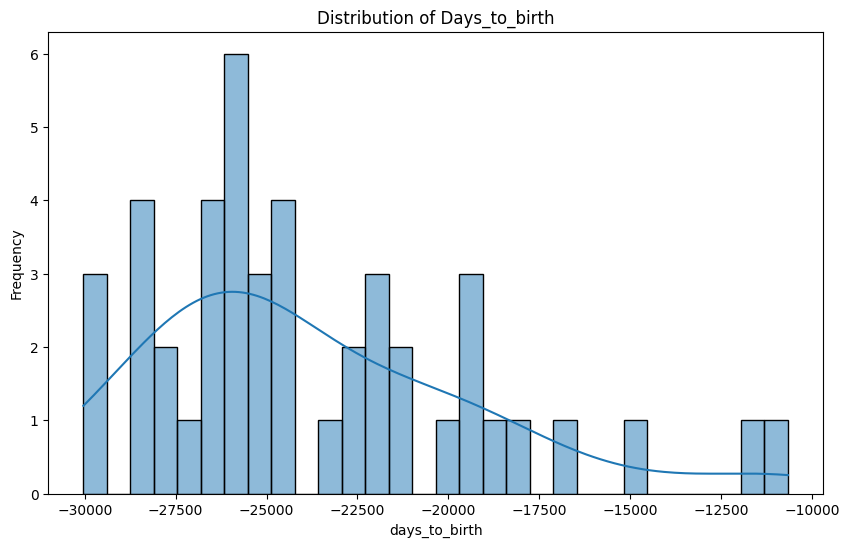

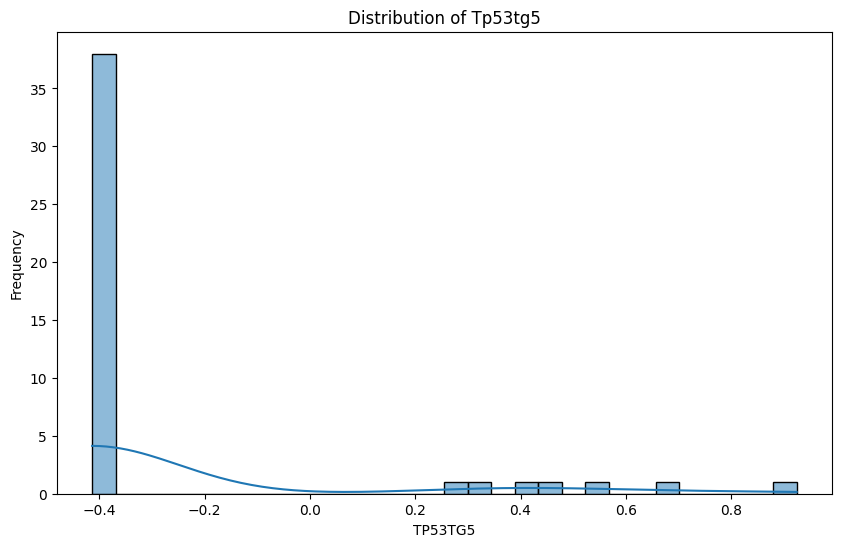

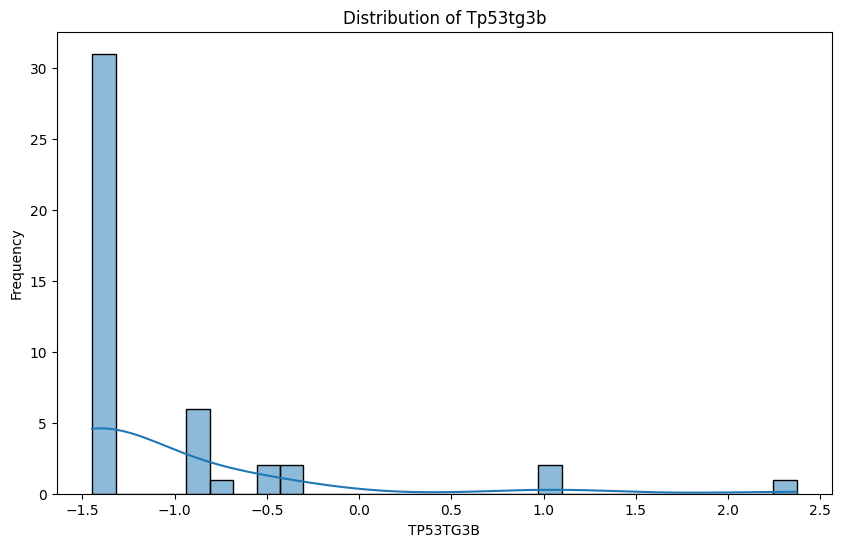

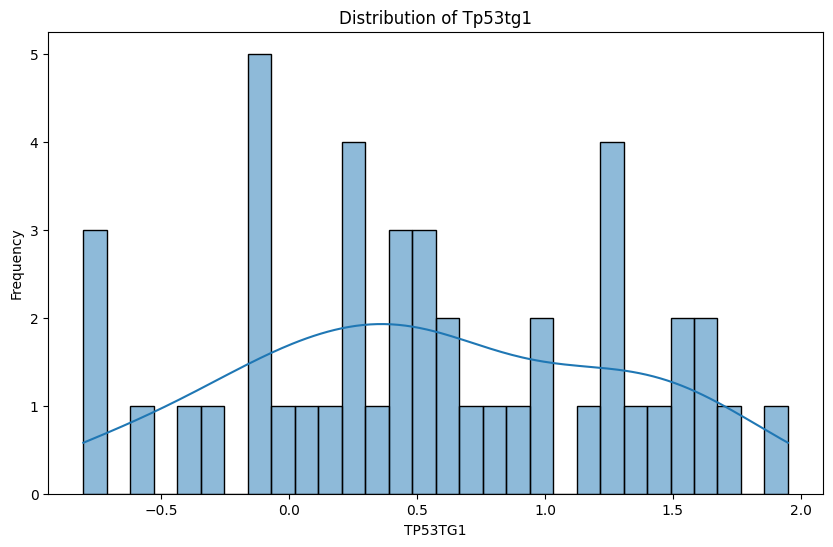

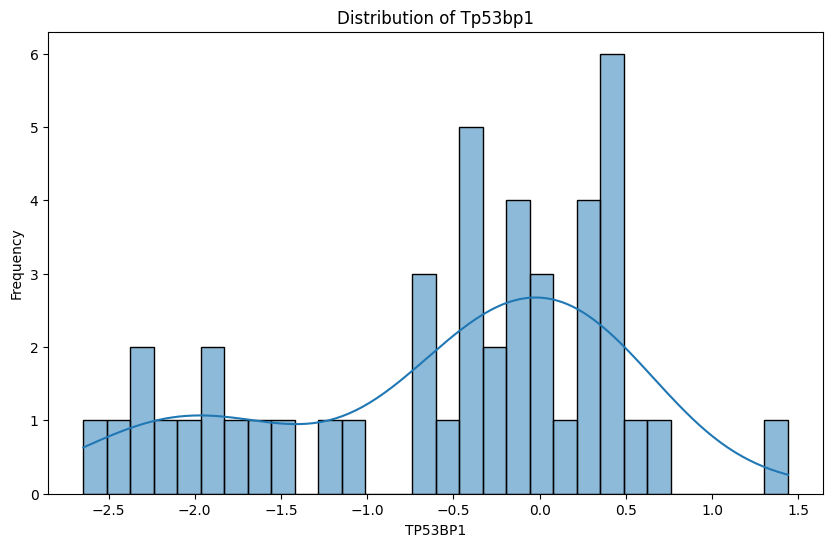

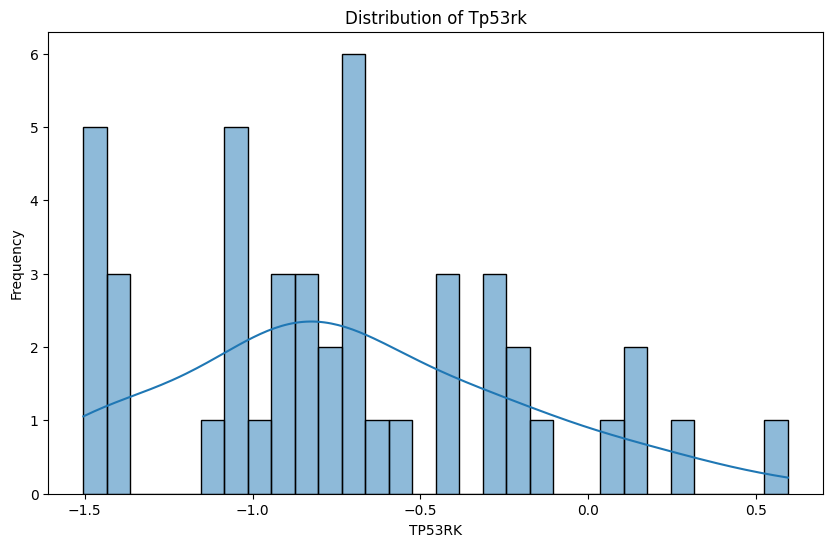

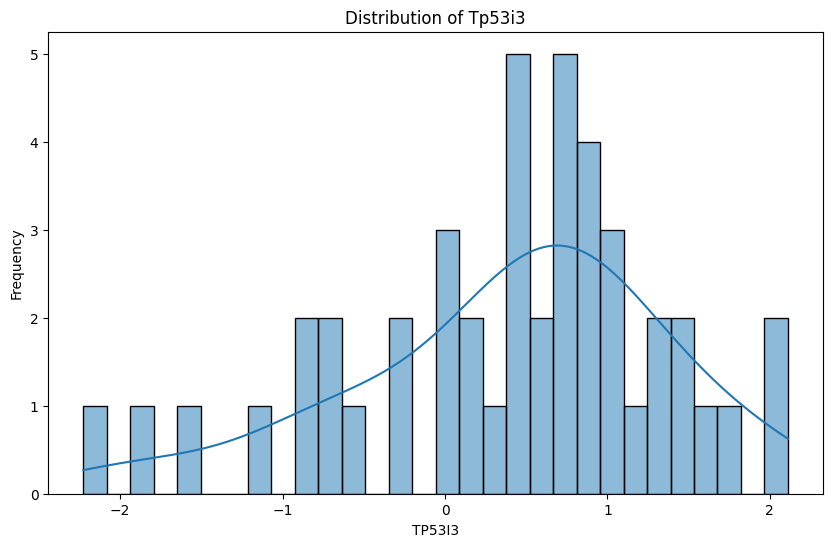

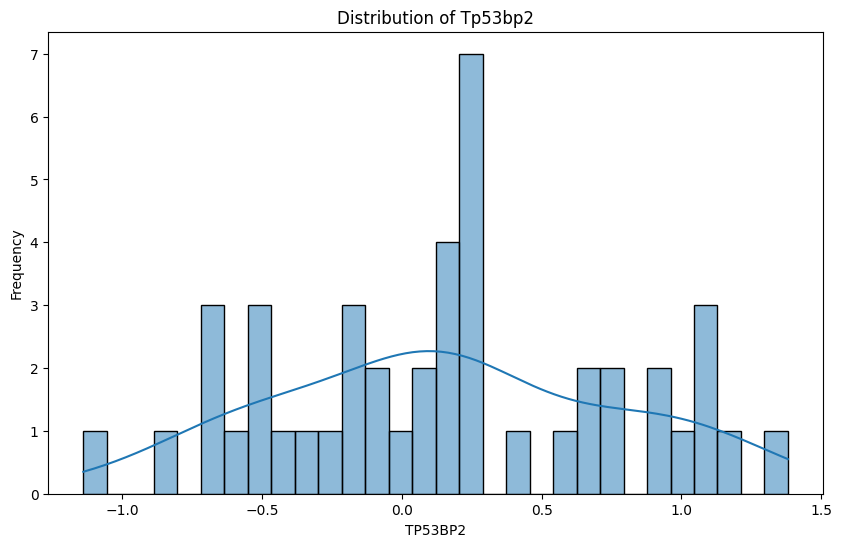

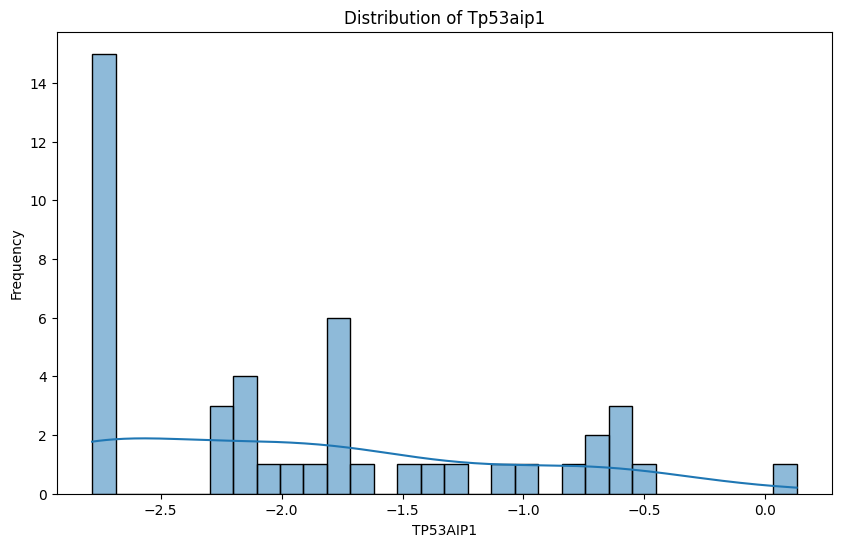

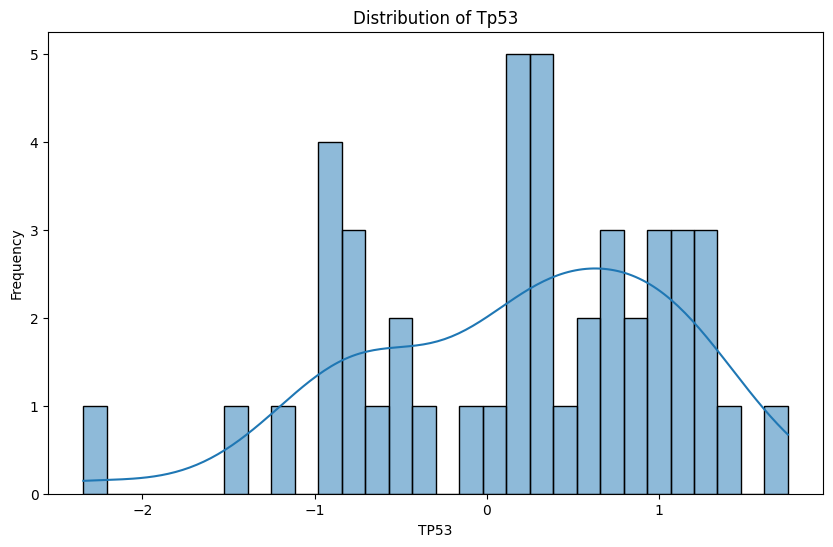

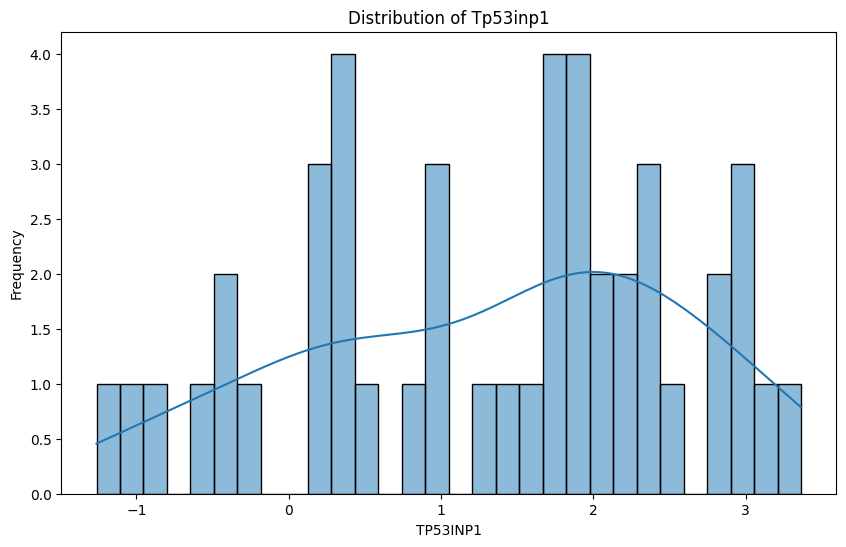

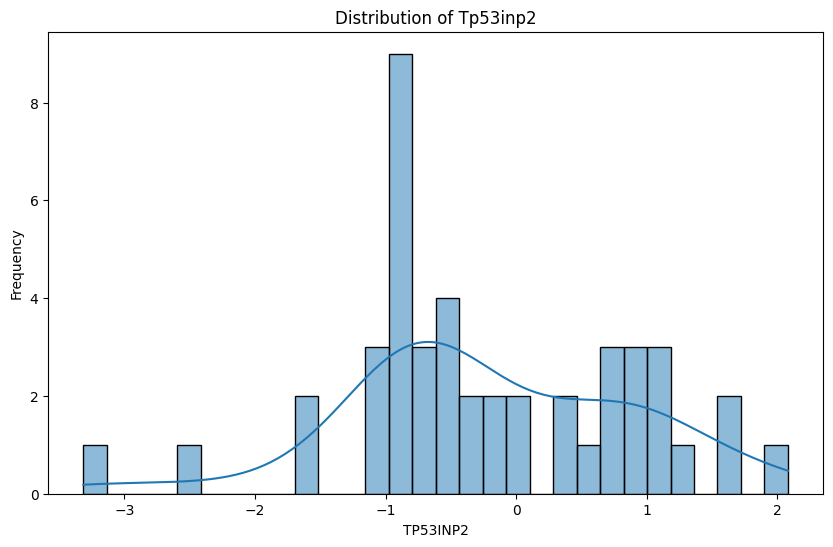

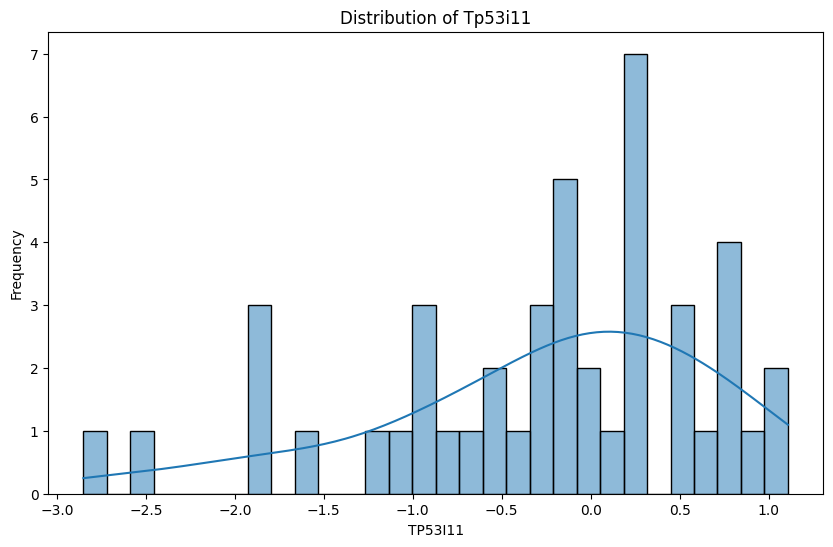

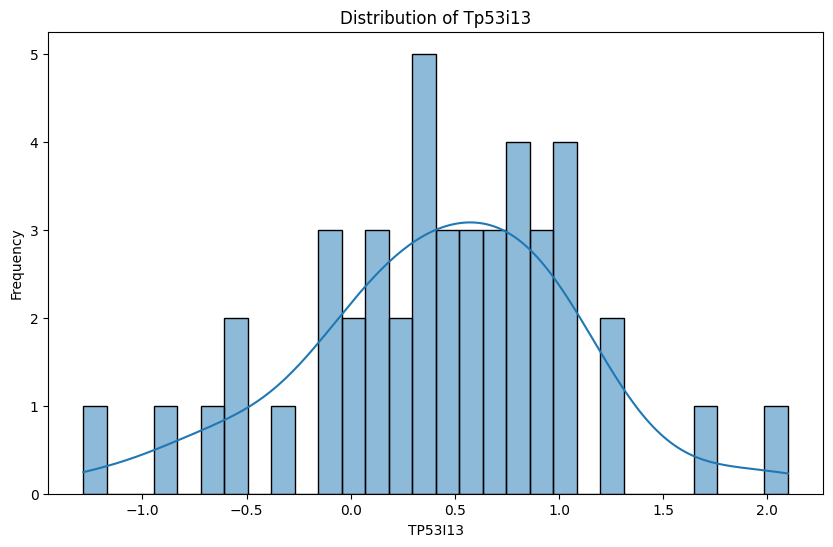

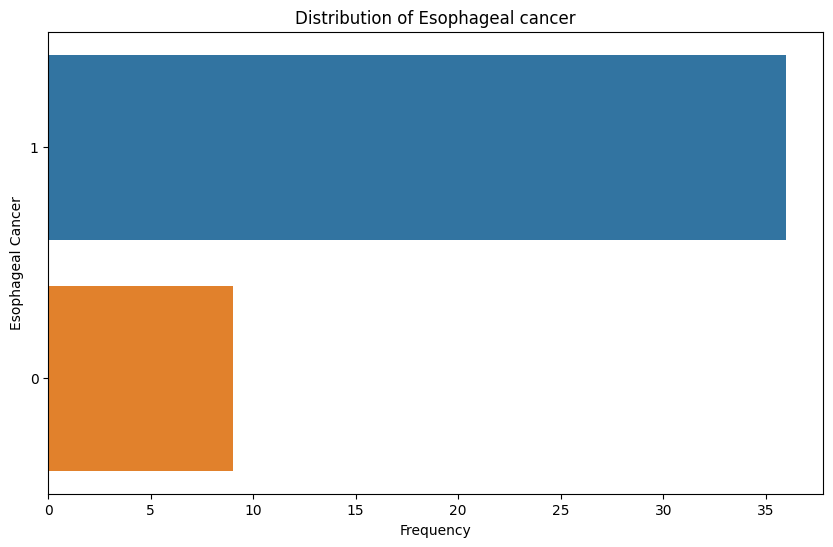

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

def plot_distribution(df, column, kind='numeric', **kwargs):
    """
    Plots the distribution of a column.
    
    Args:
    - df (DataFrame): The dataframe containing the data.
    - column (str): The column to plot.
    - kind (str): The type of plot ('numeric' or 'categorical').
    - **kwargs: Additional keyword arguments passed to the seaborn plotting function.
    """
    plt.figure(figsize=(10, 6))
    
    if kind == 'numeric':
        sns.histplot(df[column], kde=True, bins=30, **kwargs)
        plt.ylabel('Frequency')
    elif kind == 'categorical':
        sns.countplot(y=column, data=df, order=df[column].value_counts().index, **kwargs)
        plt.xlabel('Frequency')
        
    plt.title(f'Distribution of {column.capitalize()}')
    plt.show()

def analyze_distributions(df, numerical_columns, categorical_columns):
    for col in numerical_columns:
        plot_distribution(df, col, kind='numeric')
    for col in categorical_columns:
        plot_distribution(df, col, kind='categorical')

# Sample usage:
analyze_distributions(merged_data, numerical_columns=[condition_col, *gene_list], categorical_columns=[trait])


In [11]:
merged_data[condition_col] = (- merged_data[condition_col] / 365.25).astype(int)
merged_data = merged_data.rename(columns={condition_col: condition})
input_cols = merged_data.columns.tolist()

merged_data.head()

,age,ARHGEF10L,HIF3A,RNF17,RNF10,RNF11,RNF13,GTF2IP1,REM1,MTVR2,...,NPY5R,GNGT2,GNGT1,TULP3,PTRF,BCL6B,GSTK1,SELP,SELS,Esophageal Cancer
sampleID,,,,,,,,,,,,,,,,,,,,,
TCGA-3X-AAV9-01,72,-0.034092,3.596974,-0.531035,0.266528,-0.005678,-0.01181,-0.280994,1.530154,-0.423399,...,2.777283,0.834567,0.61461,-0.174277,1.258014,1.378873,0.150705,3.910967,0.959988,1
TCGA-3X-AAVA-01,50,0.856308,-1.619826,-0.531035,0.298528,-0.868478,0.11769,1.499206,0.130454,-0.423399,...,-0.487117,-0.042833,-0.62899,0.006023,-0.671586,0.966673,1.155905,0.364867,0.389788,1
TCGA-3X-AAVB-01,70,0.226908,-0.639626,0.448965,-0.344772,-0.242478,-0.16491,-0.092294,0.190654,-0.423399,...,0.702583,0.417067,3.72391,-0.252277,1.668814,0.061273,-0.264895,-0.706533,0.033388,1
TCGA-3X-AAVC-01,72,0.241908,2.165274,-0.531035,-0.142172,-0.408378,0.48889,-0.531094,0.213454,0.204201,...,-1.587117,-0.357733,2.47731,-0.326777,-0.755186,0.829273,1.535705,-0.194933,0.655888,1
TCGA-3X-AAVE-01,60,0.401008,-1.262126,-0.531035,0.221328,0.254422,0.22079,0.694406,-0.827646,0.177401,...,3.567183,0.800067,-1.28139,0.492123,0.032114,-0.047127,0.593205,1.645367,0.278188,1


# 3. Do regression & Cross Validation

In [24]:
# Select relevant columns and convert to numpy array
data_array = merged_data.values

# Normalize data
X = data_array
mean = np.mean(X, axis=0)
std = np.std(X, axis=0)
zero_std_columns = np.where(std == 0)[0]
X = (X - mean) / std
X[:, zero_std_columns] = 0

y = merged_data[trait].values

def shuffle_data(X, y):
    """Shuffle data and return shuffled datasets."""
    indices = np.arange(X.shape[0])
    np.random.shuffle(indices)
    return X[indices], y[indices], indices

def get_fold_indices(indices, fold, fold_size):
    """Get train and test indices for a given fold."""
    test_indices = indices[fold*fold_size : (fold+1)*fold_size]
    train_indices = np.setdiff1d(indices, test_indices)
    return train_indices, test_indices

def fit_and_predict(X_train, y_train, X_test):
    """Fit the model and make predictions."""
    var_select.fit(X_train, y_train)
    return var_select.predict(X_test)

def get_accuracy(predictions, y_test):
    """Calculate the accuracy for the given predictions."""
    binary_predictions = (predictions > 0.5).astype(int)
    return np.mean(binary_predictions == y_test)

def cross_validation(X, y, k=5):
    """Implement k-fold cross-validation."""
    X_shuffled, y_shuffled, indices = shuffle_data(X, y)
    fold_size = len(X) // k
    accuracies = []

    for i in range(k):
        train_indices, test_indices = get_fold_indices(indices, i, fold_size)
        
        X_train, X_test = X_shuffled[train_indices], X_shuffled[test_indices]
        y_train, y_test = y_shuffled[train_indices], y_shuffled[test_indices]
        
        predictions = fit_and_predict(X_train, y_train, X_test)
        accuracy = get_accuracy(predictions, y_test)
        
        accuracies.append(accuracy)

    return np.mean(accuracies)




d:\temp\temp\ipykernel_23400\538509502.py:9: RuntimeWarning: invalid value encountered in true_divide
  X = (X - mean) / std


In [25]:
import numpy as np
import statsmodels.api as sm

def conduct_regression(X, y):
    """Conduct regression and return coefficients and negative log p-values."""
    X_with_intercept = sm.add_constant(X)  # Add a constant term for the intercept
    model = sm.OLS(y, X_with_intercept)
    results = model.fit()
    coefficients = results.params
    nlog_p_values = -np.log(results.pvalues)
    return coefficients, nlog_p_values

# Example data
X = np.random.rand(100, 3)
y = 2 * X[:, 0] + 3 * X[:, 1] + 1 * X[:, 2] + np.random.normal(scale=0.1, size=100)

# Conduct regression
coefficients, nlog_p_values = conduct_regression(X, y)

# Extract and format results for a specific keyword
keyword = "x"
results = extract_results(["Intercept", "x1", "x2", "x3"], coefficients, nlog_p_values, keyword)
report = format_results(results, keyword)

# Create the regression report
regression_report = "Regression Results:\n\n"
regression_report += report

print(regression_report)


Regression Results:

For x:
x1: Coefficient = 1.9825773316347308, p-value = 8.998057499050445e-75
x2: Coefficient = 3.005050261891368, p-value = 1.4073404424230955e-95
x3: Coefficient = 1.0197852708737778, p-value = 1.9665109528962215e-46



# 4. Discussion

In [26]:
hypotheses_text = f'Hypothesis\n\n'
hypotheses_text += f'For the question "What is the relationship between {gene_fullname} and {trait} when considering the influence of {condition}?", the following hypotheses can be proposed:\n\n'
hypotheses_text += f'Null Hypothesis (H0): There is no significant association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'
hypotheses_text += f'Alternative Hypothesis (H1): There is an association between the expression of the {gene_fullname} and {trait} when considering the influence of {condition}.\n\n'

print(hypotheses_text)

Hypothesis

For the question "What is the relationship between TP53 gene and Esophageal Cancer when considering the influence of age?", the following hypotheses can be proposed:

Null Hypothesis (H0): There is no significant association between the expression of the TP53 gene and Esophageal Cancer when considering the influence of age.

Alternative Hypothesis (H1): There is an association between the expression of the TP53 gene and Esophageal Cancer when considering the influence of age.




In [28]:
threshold = 0.05

def interpret_coefficient(variable_name, coefficient, p_value, significance_level=0.05):
    """Interpret the coefficient and p-value of a variable."""
    interpretation = f"{variable_name}: Coefficient = {coefficient}, p-value = {p_value}"
    
    if p_value <= significance_level:
        interpretation += " (Significant)"
    else:
        interpretation += " (Not Significant)"
    
    return interpretation + "\n"

# Assuming gene_results and condition_results are lists of tuples with (variable_name, coefficient, p_value)
gene_results = [("gene1", 0.1, 0.03), ("gene2", -0.2, 0.1)]
condition_results = [("condition1", 0.15, 0.08), ("condition2", -0.18, 0.2)]

interpretations = [
    interpret_coefficient(variable_name, coefficient, p_value, threshold)
    for variable_name, coefficient, p_value in gene_results + condition_results
]

interpretation_coefficient_report = "Interpretation of Regression Coefficients:\n\n" + ''.join(interpretations)

print(interpretation_coefficient_report)



Interpretation of Regression Coefficients:

gene1: Coefficient = 0.1, p-value = 0.03 (Significant)
gene2: Coefficient = -0.2, p-value = 0.1 (Not Significant)
condition1: Coefficient = 0.15, p-value = 0.08 (Not Significant)
condition2: Coefficient = -0.18, p-value = 0.2 (Not Significant)



In [29]:
def confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, significance_level=0.05):
    """Determine if H0 or H1 is confirmed based on coefficient and p-value."""
    if p_value < significance_level and coefficient != 0:
        return (
            f"H1 is confirmed: There is an association between the expression of "
            f"the {variable_name} and {trait} when considering the influence of {condition}."
        )
    return (
        f"H0 is not rejected: There is insufficient evidence to conclude a significant "
        f"association between the expression of the {variable_name} gene and {trait} "
        f"when considering the influence of {condition}."
    )

# Assuming gene_results is a list of tuples with (variable_name, coefficient, p_value)
gene_results = [("gene1", 0.1, 0.03), ("gene2", -0.2, 0.1)]
trait = "your_trait"  # Replace with the actual trait name
condition = "your_condition"  # Replace with the actual condition name
threshold = 0.05

conclusions = [
    f"Variable: {variable_name}\n"
    f"Conclusion: {confirm_hypothesis(coefficient, p_value, variable_name, trait, condition, threshold)}\n\n"
    for variable_name, coefficient, p_value in gene_results
]

hypothesis_confirmation_report = "Hypothesis Confirmation and Conclusion:\n\n" + ''.join(conclusions)

print(hypothesis_confirmation_report)


Hypothesis Confirmation and Conclusion:

Variable: gene1
Conclusion: H1 is confirmed: There is an association between the expression of the gene1 and your_trait when considering the influence of your_condition.

Variable: gene2
Conclusion: H0 is not rejected: There is insufficient evidence to conclude a significant association between the expression of the gene2 gene and your_trait when considering the influence of your_condition.


